In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
'%matplotlib inline'
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns' , None)

In [3]:
data = pd.read_csv("WineQT.csv")
data.reset_index(drop = True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
data["fixed acidity"] = data["fixed acidity"].apply(lambda x : float(x))

# Data Preprocessing

fixed acidity 1.0449299563724053


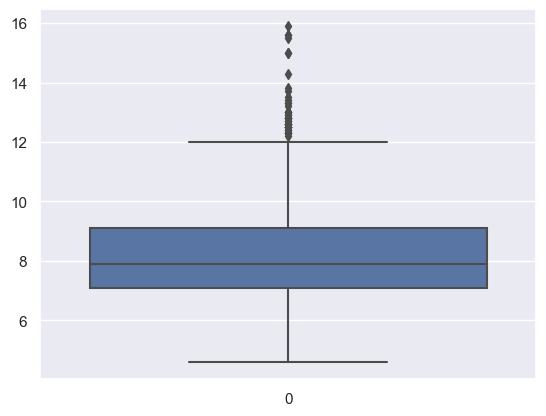

volatile acidity 0.6815474143781255


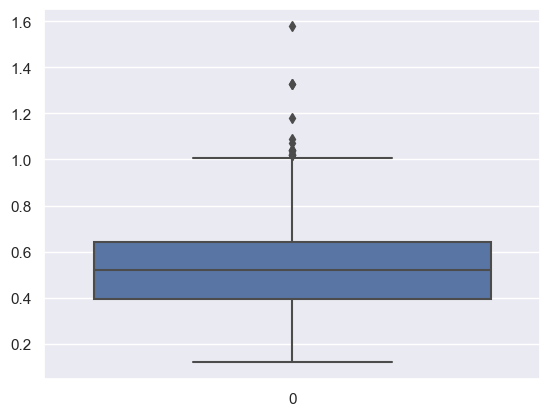

citric acid 0.3715607833706083


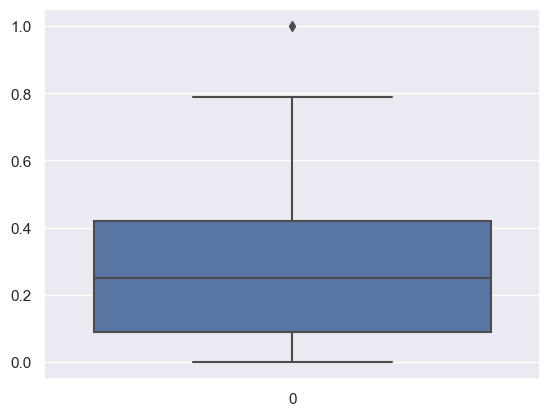

residual sugar 4.361096404323471


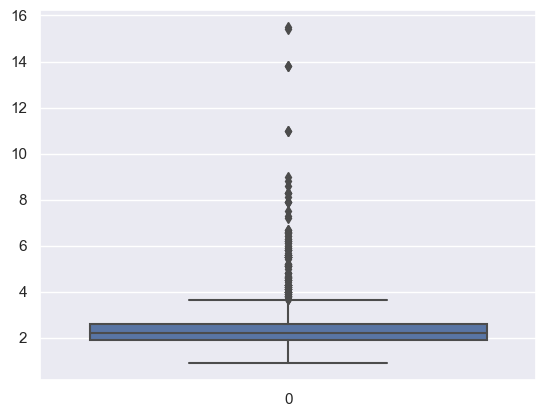

chlorides 6.026360154399587


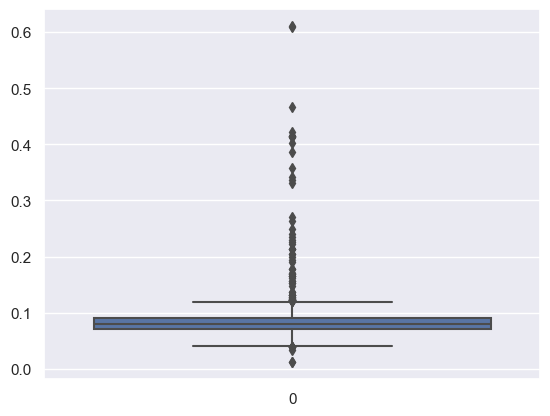

free sulfur dioxide 1.2312611567075427


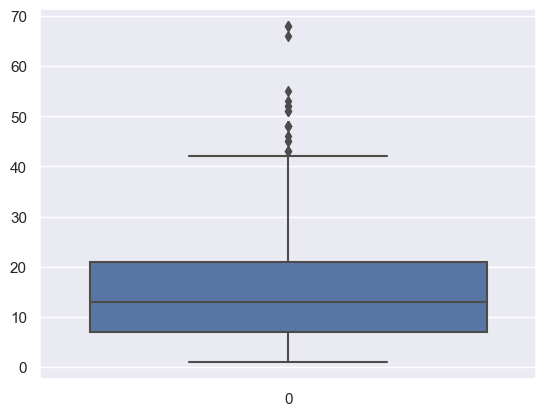

total sulfur dioxide 1.6657660141342994


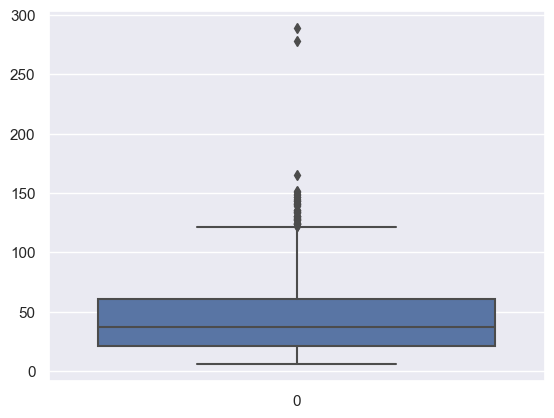

density 0.102395108720599


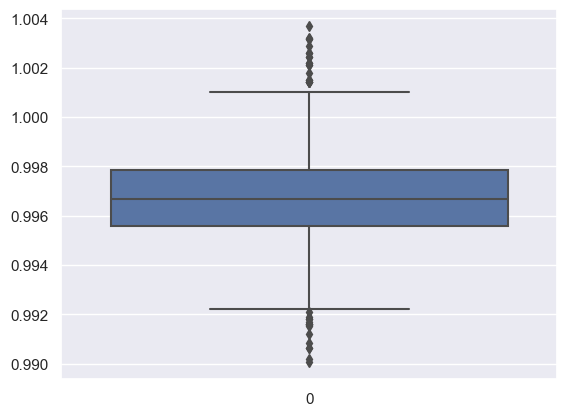

pH 0.22113839209685748


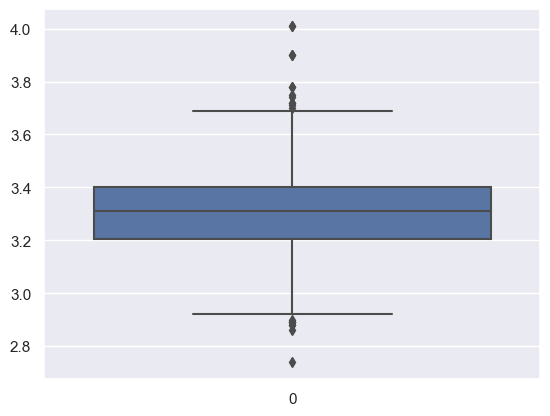

sulphates 2.497266051332364


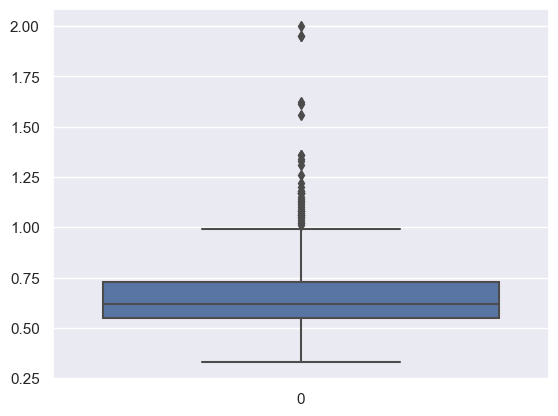

alcohol 0.8633132317223615


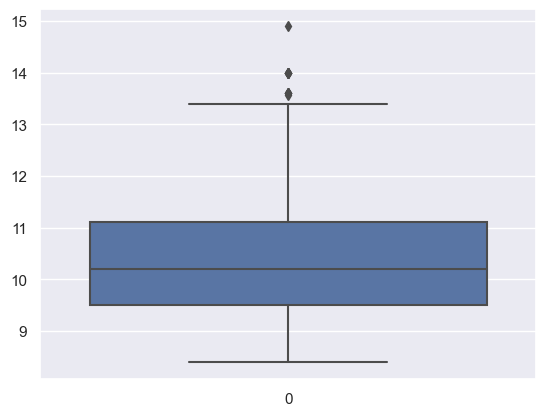

Id -0.010419214399482268


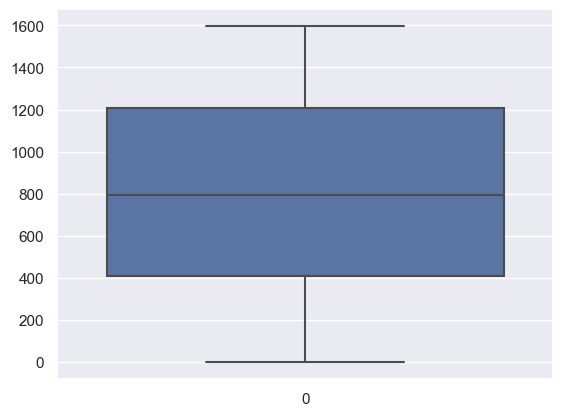

In [6]:
for column in data.drop("quality" , axis =1 ).columns:
    print(column , data[column].skew())
    sns.boxplot(data[column])
    plt.show()

In [7]:
outlier_columns = data.drop("quality" , axis = 1)


def outlier(data, outlier_columns):
    for column in outlier_columns:
        iq1 = np.percentile(data[column] , 25 , method="linear")
        iq3 = np.percentile(data[column] , 75 , method="linear")
        iqr = iq3 - iq1
        ll = iq1- 1.5*iqr
        ul = iq3 - 1.5*iqr
        data[column][data[column] <= ll] = np.nan
        data[column][data[column] >= ul] = np.nan
        
        
outlier(data,outlier_columns)     

In [8]:
# At one go, we have to use capping method
X = data.drop("quality" , axis = 1)
Q1 =X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(UL)
print(LL)

fixed acidity           5.17500
volatile acidity        0.19750
citric acid                 NaN
residual sugar          1.40000
chlorides               0.04900
free sulfur dioxide         NaN
total sulfur dioxide        NaN
density                 0.99323
pH                      3.02000
sulphates               0.42000
alcohol                 8.40000
Id                      2.25000
Name: 0.25, dtype: float64
fixed acidity           5.900
volatile acidity        0.240
citric acid               NaN
residual sugar          1.500
chlorides               0.058
free sulfur dioxide       NaN
total sulfur dioxide      NaN
density                 0.994
pH                      3.090
sulphates               0.450
alcohol                 8.450
Id                      6.750
Name: 0.75, dtype: float64
fixed acidity           0.72500
volatile acidity        0.04250
citric acid                 NaN
residual sugar          0.10000
chlorides               0.00900
free sulfur dioxide         NaN
total sulf

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         48 non-null     float64
 1   volatile acidity      48 non-null     float64
 2   citric acid           0 non-null      float64
 3   residual sugar        55 non-null     float64
 4   chlorides             111 non-null    float64
 5   free sulfur dioxide   0 non-null      float64
 6   total sulfur dioxide  0 non-null      float64
 7   density               89 non-null     float64
 8   pH                    91 non-null     float64
 9   sulphates             48 non-null     float64
 10  alcohol               3 non-null      float64
 11  quality               1143 non-null   int64  
 12  Id                    10 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 116.2 KB


In [22]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1141,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
from sklearn.impute import KNNImputer


X[((X > UL) | (X < LL))] = np.nan
imputer=KNNImputer(n_neighbors=11)
pd.DataFrame(data = imputer.fit_transform(X), columns=X.columns)

#data = pd.concat([dataset , data['quality']] , axis = 1 )

ValueError: Shape of passed values is (1143, 9), indices imply (1143, 12)

In [ ]:
data.head()

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr())

In [ ]:
x = data.drop(["quality" , "Id"] , axis = 1)
y = data["quality"]

In [ ]:
from imblearn.over_sampling import SMOTE

over_sample = SMOTE()

x , y = over_sample.fit_resample(x , y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.3 , random_state= 43 )

In [ ]:
x_train.shape , y_train.shape 

In [ ]:
 x_test.shape , y_test.shape 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(x_train , y_train )
train_predict = lr.predict(x_train)
test_predict = lr.predict(x_test)


In [ ]:
metrics.accuracy_score(train_predict , y_train) , metrics.accuracy_score(test_predict , y_test)

In [ ]:
print(metrics.classification_report(train_predict , y_train))

In [ ]:
print(metrics.classification_report(test_predict , y_test))

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train , y_train )
train_predict_svc = lr.predict(x_train)
test_predict_svc = lr.predict(x_test)

In [ ]:
metrics.accuracy_score(train_predict_svc , y_train) , metrics.accuracy_score(test_predict_svc , y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)
train_predict_dtc = lr.predict(x_train)
test_predict_dtc = lr.predict(x_test)

In [ ]:
metrics.accuracy_score(train_predict_dtc , y_train) , metrics.accuracy_score(test_predict_dtc , y_test)